In [1]:
# -*- coding: utf-8 -*-

import time

import numpy as np
import pandas as pd
#import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

save_folder = './MLP/'

In [2]:
df = pd.read_csv('haberman.data', header = None)
#df.columns = ['Idade', 'Ano_da_Operacao', 'No_de_Nos_Axilares_Pos', 'Estado_Sobrevivencia']

print(df.shape) # (306, 4)
df.describe().to_excel(save_folder + 'describe.xlsx')
print(df.describe())

(306, 4)
                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


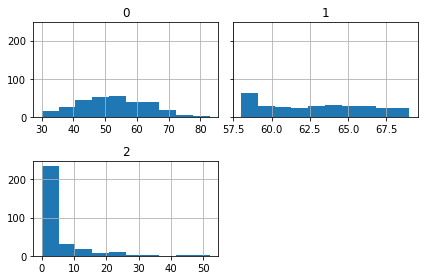

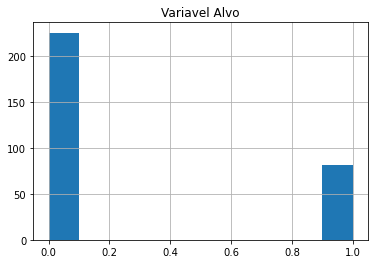

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y = y - 1

X.hist(sharey=True)
plt.title('Variaveis de Entrada')
plt.tight_layout()
plt.xlim(0, 100)
plt.savefig(save_folder + 'X_hist.png')
plt.show()

y.hist()
plt.title('Variavel Alvo')
plt.savefig(save_folder + 'y_hist.png')
plt.show()

In [4]:
print(df['survival_status'].value_counts())

1    225
2     81
Name: survival_status, dtype: int64


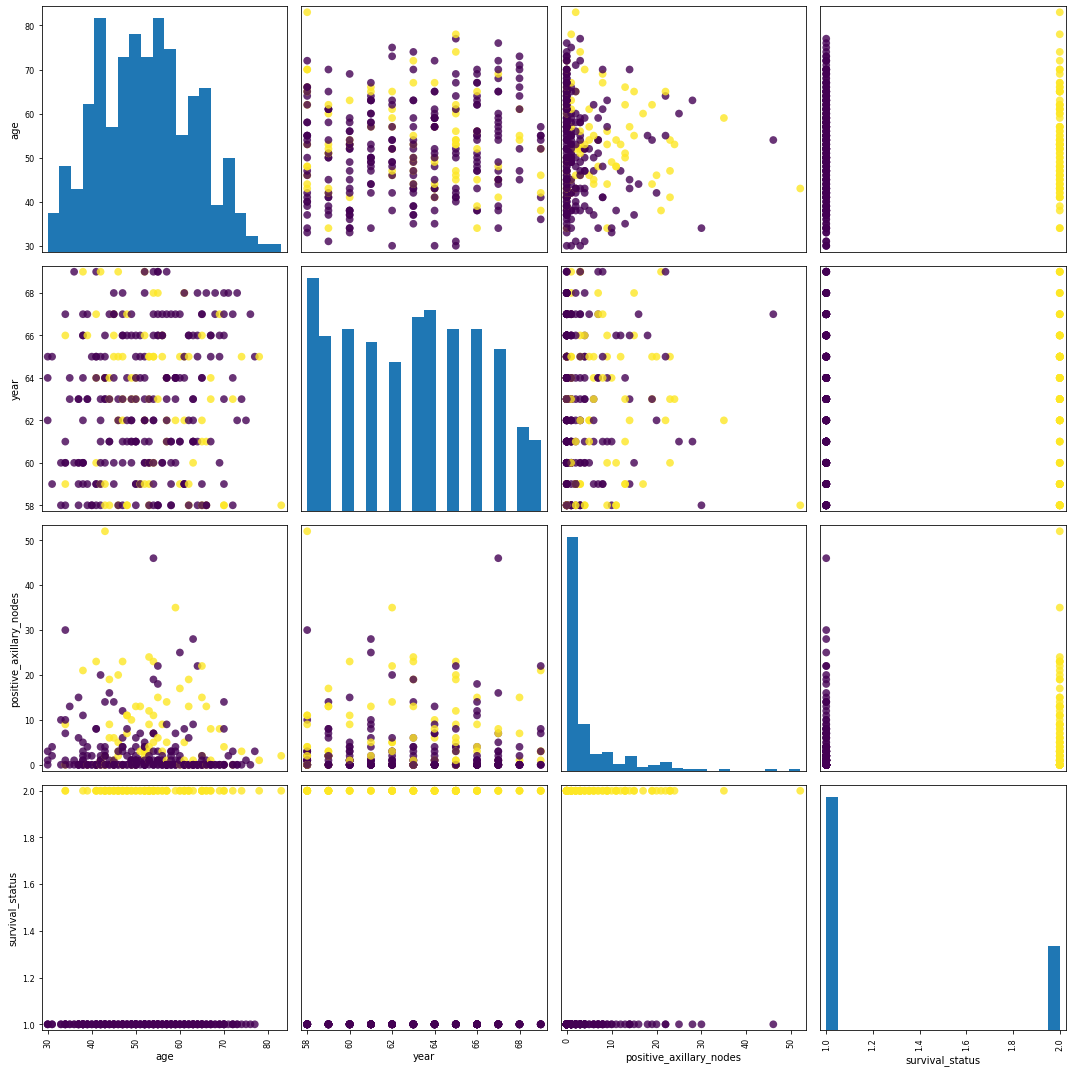

In [5]:
pd.plotting.scatter_matrix(df, c=y, figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.tight_layout()
plt.savefig(save_folder + 'scatter_plot.png')
plt.show()

In [6]:
np.random.seed(int(time.time()))
k_values = np.arange(5, 200, 20)

In [7]:
scores = []
for k in k_values:
    accs = []
    for i in range(10):
        seed = np.random.randint(999999999)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        accs.append(knn.score(X_test, y_test))
        
    scores.append(accs)


In [22]:
np.savetxt(save_folder + 'scores.txt', scores)

medians = []
for i in range(len(scores)):
    medians.append(np.median(scores[i]))

_medians = list(np.copy(medians))
max_list = sorted(_medians)
max1 = _medians.index(max_list[-1])
del(_medians[max1])
max2 = _medians.index(max_list[-2]) + 1

np.savetxt(save_folder + 'medians.txt', medians)

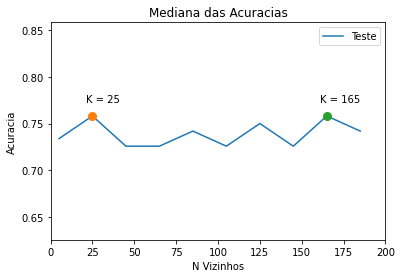

In [24]:
plt.plot(k_values, medians)
plt.plot(k_values[max1], medians[max1], 'o', label='max1', markersize=8)
plt.plot(k_values[max2], medians[max2], 'o', label='max2', markersize=8)
plt.xlim(0, 200)
plt.ylim(min(medians) - 0.1, max(medians) + 0.1)
plt.annotate('K = %i'%(k_values[max1]), (k_values[max1] - 4,  medians[max1] + 0.015))
plt.annotate('K = %i'%(k_values[max2]), (k_values[max2] - 4,  medians[max2] + 0.015))
plt.title('Mediana das Acuracias')
plt.ylabel('Acuracia')
plt.xlabel('N Vizinhos')
plt.legend(['Teste'])
plt.savefig(save_folder + 'P1_outs.png')
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors = k_values[max1])
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

conf_mat = pd.crosstab(y_test, y_pred)
print(conf_mat)

conf_mat.to_excel(save_folder + 'conf_matrix.xlsx')

col_0             0  1
survival_status       
0                45  3
1                12  2


# PCA

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

save_folder = './com_pca/'

n_comps = 2

X = StandardScaler().fit_transform(X)
pca = PCA(n_components = n_comps)

X = pca.fit_transform(X)

df_X = pd.DataFrame(X)
print(df_X.describe())

                  0             1
count  3.060000e+02  3.060000e+02
mean   1.857628e-16 -2.539726e-17
std    1.055942e+00  9.998604e-01
min   -2.503637e+00 -1.336894e+00
25%   -6.631953e-01 -7.743523e-01
50%    9.907102e-03 -1.348652e-01
75%    6.548567e-01  4.159343e-01
max    4.268923e+00  5.517063e+00


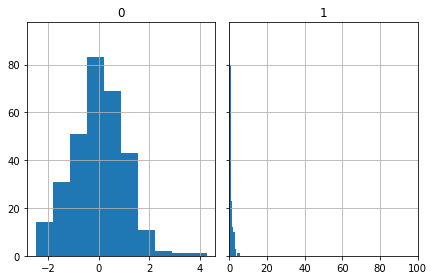

In [27]:
df_X.hist(sharey=True)
plt.tight_layout()
plt.xlim(0, 100)
plt.savefig(save_folder + 'X_hist.png')
plt.show()

In [28]:
scores = []
for k in k_values:
    accs = []
    for i in range(10):
        seed = np.random.randint(999999999)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        accs.append(knn.score(X_test, y_test))
        
    scores.append(accs)

In [29]:
np.savetxt(save_folder + 'scores.txt', scores)

medians = []
for i in range(len(scores)):
    medians.append(np.median(scores[i]))

_medians = list(np.copy(medians))
max_list = sorted(_medians)
max1 = _medians.index(max_list[-1])
del(_medians[max1])
max2 = _medians.index(max_list[-2]) + 1

np.savetxt(save_folder + 'medians.txt', medians)

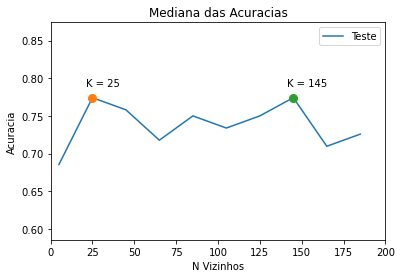

In [30]:
plt.plot(k_values, medians)
plt.plot(k_values[max1], medians[max1], 'o', label='max1', markersize=8)
plt.plot(k_values[max2], medians[max2], 'o', label='max2', markersize=8)
plt.xlim(0, 200)
plt.ylim(min(medians) - 0.1, max(medians) + 0.1)
plt.annotate('K = %i'%(k_values[max1]), (k_values[max1] - 4,  medians[max1] + 0.015))
plt.annotate('K = %i'%(k_values[max2]), (k_values[max2] - 4,  medians[max2] + 0.015))
plt.title('Mediana das Acuracias')
plt.ylabel('Acuracia')
plt.xlabel('N Vizinhos')
plt.legend(['Teste'])
plt.savefig(save_folder + 'P1_outs.png')
plt.show()

In [31]:
knn = KNeighborsClassifier(n_neighbors = k_values[max1])
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

conf_mat = pd.crosstab(y_test, y_pred)
print(conf_mat)

conf_mat.to_excel(save_folder + 'conf_matrix.xlsx')

col_0             0  1
survival_status       
0                41  4
1                15  2


# MultiLayer Perceptron

In [4]:
from sklearn.neural_network import MLPClassifier

layer_sizes = [5, 10, 50, 100, 200, 400, 500, 1000, 2000]

In [5]:
scores = []
for sizes in layer_sizes:
    accs = []
    for i in range(10):
        seed = np.random.randint(999999999)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
        mlp = MLPClassifier(hidden_layer_sizes=(sizes,), max_iter=1000, verbose=1)
        mlp.fit(X_train, y_train)
        accs.append(mlp.score(X_test, y_test))
    
    scores.append(accs)

Iteration 1, loss = 7.47198377
Iteration 2, loss = 7.31885207
Iteration 3, loss = 7.16385816
Iteration 4, loss = 7.00636692
Iteration 5, loss = 6.85128999
Iteration 6, loss = 6.68975363
Iteration 7, loss = 6.53585405
Iteration 8, loss = 6.37080195
Iteration 9, loss = 6.21220730
Iteration 10, loss = 6.04742925
Iteration 11, loss = 5.88398451
Iteration 12, loss = 5.71520430
Iteration 13, loss = 5.54169279
Iteration 14, loss = 5.37183852
Iteration 15, loss = 5.19505328
Iteration 16, loss = 5.02739571
Iteration 17, loss = 4.85812964
Iteration 18, loss = 4.67570931
Iteration 19, loss = 4.50742728
Iteration 20, loss = 4.33023417
Iteration 21, loss = 4.16439671
Iteration 22, loss = 3.97799234
Iteration 23, loss = 3.81109954
Iteration 24, loss = 3.63238024
Iteration 25, loss = 3.45441420
Iteration 26, loss = 3.28090991
Iteration 27, loss = 3.10154371
Iteration 28, loss = 2.92331051
Iteration 29, loss = 2.74515440
Iteration 30, loss = 2.56739693
Iteration 31, loss = 2.37392625
Iteration 32, los

In [6]:
np.savetxt(save_folder + 'scores.txt', scores)

medians = []
for i in range(len(scores)):
    medians.append(np.median(scores[i]))

_medians = list(np.copy(medians))
max_list = sorted(_medians)
max1 = _medians.index(max_list[-1])
del(_medians[max1])
max2 = _medians.index(max_list[-2]) + 1

np.savetxt(save_folder + 'medians.txt', medians)

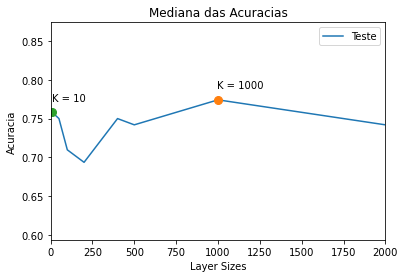

In [7]:
plt.plot(layer_sizes, medians)
plt.plot(layer_sizes[max1], medians[max1], 'o', label='max1', markersize=8)
plt.plot(layer_sizes[max2], medians[max2], 'o', label='max2', markersize=8)
plt.xlim(0, 2000)
plt.ylim(min(medians) - 0.1, max(medians) + 0.1)
plt.annotate('K = %i'%(layer_sizes[max1]), (layer_sizes[max1] - 4,  medians[max1] + 0.015))
plt.annotate('K = %i'%(layer_sizes[max2]), (layer_sizes[max2] - 4,  medians[max2] + 0.015))
plt.title('Mediana das Acuracias')
plt.ylabel('Acuracia')
plt.xlabel('Layer Sizes')
plt.legend(['Teste'])
plt.savefig(save_folder + 'P1_outs.png')
plt.show()

In [8]:
df = pd.DataFrame(scores).T

df.to_excel(save_folder + 'scores_tudo.xlsx')

In [9]:
df = pd.DataFrame(scores[max1])

df.to_excel(save_folder + 'best_MLP.xlsx')

In [10]:
print("Melhor Score: " + str(layer_sizes[max1]))

Melhor Score: 1000


# MLP com PCA

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

save_folder = './com_pca/'

n_comps = 2

X = StandardScaler().fit_transform(X)
pca = PCA(n_components = n_comps)

X = pca.fit_transform(X)

df_X = pd.DataFrame(X)
print(df_X.describe())

                  0             1
count  3.060000e+02  3.060000e+02
mean   1.857628e-16 -2.539726e-17
std    1.055942e+00  9.998604e-01
min   -2.503637e+00 -1.336894e+00
25%   -6.631953e-01 -7.743523e-01
50%    9.907102e-03 -1.348652e-01
75%    6.548567e-01  4.159343e-01
max    4.268923e+00  5.517063e+00


In [7]:
from sklearn.neural_network import MLPClassifier

layer_sizes = [5, 10, 50, 100, 200, 400, 500, 1000, 2000]

In [8]:
scores = []
for sizes in layer_sizes:
    accs = []
    for i in range(10):
        seed = np.random.randint(999999999)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
        mlp = MLPClassifier(hidden_layer_sizes=(sizes,), max_iter=1000, verbose=1)
        mlp.fit(X_train, y_train)
        accs.append(mlp.score(X_test, y_test))
    
    scores.append(accs)

Iteration 1, loss = 0.64592482
Iteration 2, loss = 0.64430003
Iteration 3, loss = 0.64263187
Iteration 4, loss = 0.64112643
Iteration 5, loss = 0.63948669
Iteration 6, loss = 0.63803838
Iteration 7, loss = 0.63650514
Iteration 8, loss = 0.63508042
Iteration 9, loss = 0.63364371
Iteration 10, loss = 0.63216865
Iteration 11, loss = 0.63083034
Iteration 12, loss = 0.62946271
Iteration 13, loss = 0.62808854
Iteration 14, loss = 0.62667682
Iteration 15, loss = 0.62529872
Iteration 16, loss = 0.62400190
Iteration 17, loss = 0.62258381
Iteration 18, loss = 0.62124274
Iteration 19, loss = 0.61985360
Iteration 20, loss = 0.61852966
Iteration 21, loss = 0.61720940
Iteration 22, loss = 0.61592202
Iteration 23, loss = 0.61457980
Iteration 24, loss = 0.61335510
Iteration 25, loss = 0.61207957
Iteration 26, loss = 0.61083238
Iteration 27, loss = 0.60969179
Iteration 28, loss = 0.60845377
Iteration 29, loss = 0.60727270
Iteration 30, loss = 0.60616299
Iteration 31, loss = 0.60507951
Iteration 32, los

In [9]:
np.savetxt(save_folder + 'scores.txt', scores)

medians = []
for i in range(len(scores)):
    medians.append(np.median(scores[i]))

_medians = list(np.copy(medians))
max_list = sorted(_medians)
max1 = _medians.index(max_list[-1])
del(_medians[max1])
max2 = _medians.index(max_list[-2]) + 1

np.savetxt(save_folder + 'medians.txt', medians)

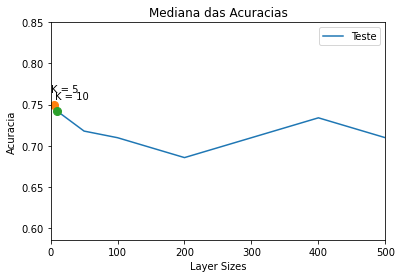

In [10]:
plt.plot(layer_sizes, medians)
plt.plot(layer_sizes[max1], medians[max1], 'o', label='max1', markersize=8)
plt.plot(layer_sizes[max2], medians[max2], 'o', label='max2', markersize=8)
plt.xlim(0, 2000)
plt.ylim(min(medians) - 0.1, max(medians) + 0.1)
plt.annotate('K = %i'%(layer_sizes[max1]), (layer_sizes[max1] - 4,  medians[max1] + 0.015))
plt.annotate('K = %i'%(layer_sizes[max2]), (layer_sizes[max2] - 4,  medians[max2] + 0.015))
plt.title('Mediana das Acuracias')
plt.ylabel('Acuracia')
plt.xlabel('Layer Sizes')
plt.legend(['Teste'])
plt.savefig(save_folder + 'P1_outs.png')
plt.show()

# Melhores Resultados Para Comparação

In [11]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25) # Melhor KNN
accs_knn = cross_val_score(knn, X, y, cv = 10)

In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=1000) # Melhor MLP
accs_mlp = cross_val_score(mlp, X, y, cv = 10)

In [63]:
df_knn = pd.DataFrame(accs_knn)
df_knn.to_excel('knn_results.xlsx')

In [ ]:
df_mlp = pd.DataFrame(accs_mlp)
df_mlp.to_excel('mlp_results.xlsx')